# Лабораторная работа №1 "Подготовка данных и кластеризация"

## 1. Импортировать данные

Скачиваем файлы, сохраняем их в одну директорию с проектом (с файлом расширения .py), импортируем и выводим на экран то, что прочитали

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
train = pd.read_csv("C:\\Users\\NIKITA\\Desktop\\Ucheba\\4 kurs 2 semestr\\II\\train.csv", header=0)
test = pd.read_csv("C:\\Users\\NIKITA\\Desktop\\Ucheba\\4 kurs 2 semestr\\II\\test.csv", header=0)


In [4]:
train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Посмотрим на названия столбцов

In [5]:
train.columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2. Изучить данные

### 2.1 в чем смысл каждой переменной

Изучаем описание данных из [источника](https://www.kaggle.com/c/titanic/data)

Исходя из содержания переменных **PassengerId, Name, Ticket, Cabin**, можем сделать вывод, что они вряд ли будут нам полезны для анализа. Поэтому исключим их из набора данных

In [7]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### 2.2 типы признаков

In [8]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [10]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Итого типы признаков:
* survived - бинарная ЦЕЛЕВАЯ переменная (метка класса)
* pclass - порядковая, возможные значения 1,2,3
* sex - бинарная, возможные значения: male, female
* Age - количественная
* sibsp - количественная
* parch - количественная
* fare - вещественная
* embarked - категориальная, возможные значения S, C, Q

In [13]:
train['Sex'] = train['Sex'].replace({'male':0, 'female':1})
train['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
train.head(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


### 2.3 рассчитать статистические характеристики

In [14]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


## 3. Провести обработку пропущенных значений

По таблице видим, что количество наблюдений в переменной возраста меньше, чем количество наблюдений в других переменных. Следовательно, там есть пропущенные значения. Заполним их медианой возраста для выборки

In [15]:
train.loc[train.Age.isnull(), 'Age'] = train['Age'].median()
train['Age'].describe()


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Если хотим не заполнять пропущенные значения, а удалить строки, в которых данных не хватает, то используем

In [16]:
train = train.dropna()
train.shape

(889, 8)

## 4. Провести обработку выбросов

Для количественных переменных можем посмотреть на графики

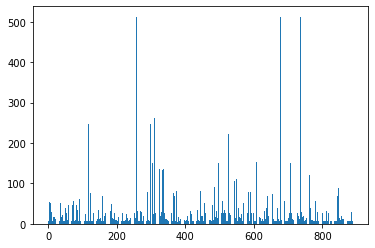

In [17]:
import matplotlib.pyplot as plt
import numpy as np
ind = np.arange(train['Fare'].count())
plt.bar(ind, train['Fare'])
plt.show()

Посчитаем, сколько в данных значений больше 300

In [18]:
train[train['Fare'] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,1,35.0,0,0,512.3292,1.0
679,1,1,0,36.0,0,1,512.3292,1.0
737,1,1,0,35.0,0,0,512.3292,1.0


Заменим большие значения средним по классу Pclass = 1

In [48]:
mean_fare_for_1_class = train[(train['Fare'] < 300) & (train['Pclass'] == 1)]['Fare'].mean()
mean_fare_for_1_class
train.loc[train['Fare'] > 300, 'Fare'] = mean_fare_for_1_class

Посмотрим, как теперь выглядит график переменной

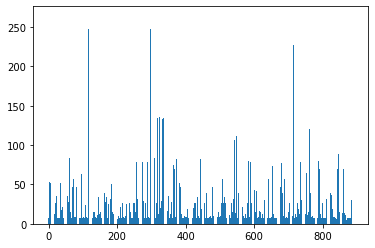

In [26]:
plt.bar(ind, train['Fare'])
plt.show()

Диаграмма рассеяния

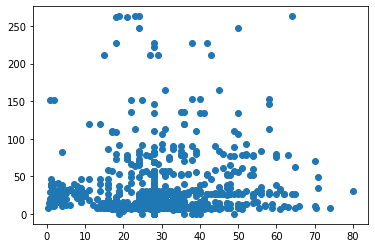

In [27]:
plt.scatter(train['Age'], train['Fare'])
plt.show()


## 5. Проверить обучающую выборку на сбалансированность

In [28]:
train['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [29]:
train['Survived'].value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

## 6. Провести Feature Construction

Сформировать новые переменные исходя из смысла признаков


Посчитаем сумму всех родственников

In [30]:
train['Relatives'] = train['SibSp'] + train['Parch']
train[['SibSp', 'Parch', 'Relatives']].head(10).tail(5)

,SibSp,Parch,Relatives
5,0,0,0
6,0,0,0
7,3,1,4
8,0,2,2
9,1,0,1


Проанализировать гистограммы

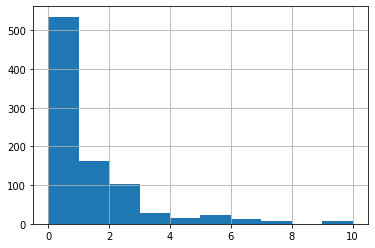

In [31]:
train['Relatives'].hist()
plt.show()

Можем привести переменную к бинарному виду

In [32]:
train.loc[train['Relatives'] > 0, 'Relatives_binary'] = 1
train.loc[train['Relatives_binary'].isnull(), 'Relatives_binary'] = 0
train[['Relatives', 'Relatives_binary']].head(10).tail(5)

,Relatives,Relatives_binary
5,0,0.0
6,0,0.0
7,4,1.0
8,2,1.0
9,1,1.0


# 7. Привести Dataset к нужному виду для подачи в алгоритм, если:

Алгоритм принимает на вход только числовые данные алгоритм чувствителен к масштабу признаков

Выберем только количественные переменные и нормализуем их

In [33]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Relatives', 'Relatives_binary'],
      dtype='object')

In [34]:
quantitative = train[['Age', 'SibSp', 'Parch', 'Fare', 'Relatives']]
quantitative.head(5)

,Age,SibSp,Parch,Fare,Relatives
0,22.0,1,0,7.2500,1
1,38.0,1,0,71.2833,1
2,26.0,0,0,7.9250,0
3,35.0,1,0,53.1000,1
4,35.0,0,0,8.0500,0


Трансформируем Pandas DataFrame в Numpy Array

In [35]:
X = quantitative.values
X

array([[22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [38.    ,  1.    ,  0.    , 71.2833,  1.    ],
       [26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ,  3.    ],
       [26.    ,  0.    ,  0.    , 30.    ,  0.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ,  0.    ]])

Нормализуем переменные

In [36]:
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler().fit(X)
X_normalized = stand_scaler.transform(X)
X_normalized


array([[-0.56367407,  0.43135024, -0.47432585, -0.56811759,  0.05785331],
       [ 0.66921696,  0.43135024, -0.47432585,  0.98775605,  0.05785331],
       [-0.25545131, -0.47519908, -0.47432585, -0.55171652, -0.5618044 ],
       ...,
       [-0.10133993,  0.43135024,  2.00611934, -0.17449189,  1.29716872],
       [-0.25545131, -0.47519908, -0.47432585, -0.01534075, -0.5618044 ],
       [ 0.20688282, -0.47519908, -0.47432585, -0.55596865, -0.5618044 ]])

## 8. Осуществить сокращение размерности данных методом главных компонент

Применяем метод главных компонент

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_normalized)
X_reduced = pca.transform(X_normalized)
X_reduced

array([[ 0.00644977, -0.86751258],
       [ 0.12968899,  1.08207081],
       [-0.91052469, -0.54870042],
       ...,
       [ 1.99285431, -0.09044487],
       [-0.77968134, -0.18583882],
       [-1.0076745 , -0.21519263]])

Визуализируем нашу обучающую выборку

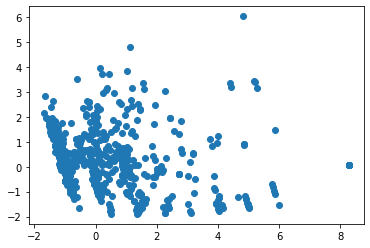

In [38]:
plt.scatter(X_reduced[:,0], X_reduced[:,1])
plt.show()

## 9. Провести кластеризацию 3-мя методами, для каждого метода сделать 3 варианта с различными параметрами

Агломеративная кластеризация + нарисовать дендрограмму

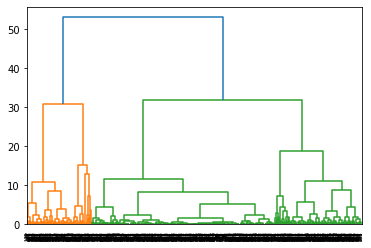

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_reduced, method='ward', metric='euclidean')
plt.figure()
dn = dendrogram(Z)
plt.show()

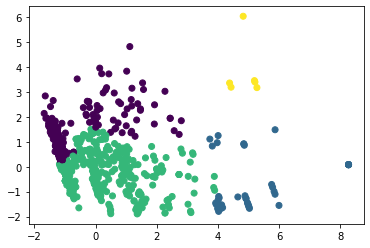

In [41]:
from sklearn.cluster import AgglomerativeClustering
labels = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete').fit_predict(X_reduced)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels)
plt.show()

Посчитаем значение критерия силуэта для такого разбиения

In [43]:
from sklearn.metrics import silhouette_score
silhouette_score(X_reduced, labels, metric='manhattan')

0.3985025082923575

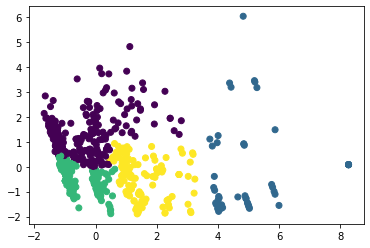

In [44]:
from sklearn.cluster import AgglomerativeClustering
labels = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit_predict(X_reduced)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels)
plt.show()

In [45]:
from sklearn.metrics import silhouette_score
silhouette_score(X_reduced, labels, metric='euclidean')

0.47326151332466115

# Алгоритм k-means (k-средних)

Наиболее простой, но в то же время достаточно неточный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.

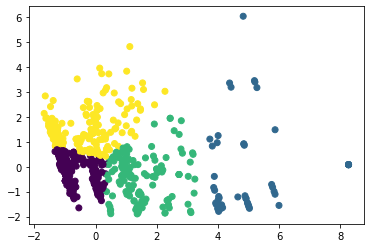

In [46]:
from sklearn.cluster import KMeans
labels = KMeans(n_clusters=4).fit_predict(X_reduced)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels)
plt.show()

# DBSCAN DBSCAN 

Пространственная кластеризация приложений с шумом на основе плотности (DBSCAN) - это алгоритм кластеризации данных , предложенный Мартином Эстером , Хансом-Петером Кригелем , Йоргом Сандером и Сяовей Сюй в 1996 году. Это непараметрический алгоритм кластеризации на основе плотности : задан набор точек в некотором пространстве, он группирует точки, которые плотно упакованы вместе (точки со многими ближайшими соседями ), отмечая как выбросы точки, которые лежат одни в регионах с низкой плотностью (ближайшие соседи которых находятся слишком далеко). DBSCAN - один из наиболее распространенных алгоритмов кластеризации, который также наиболее цитируется в научной литературе.

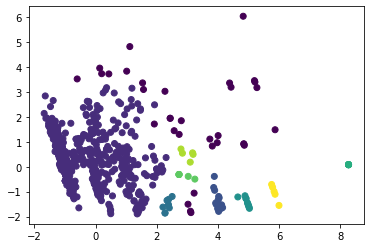

In [47]:
from sklearn.cluster import DBSCAN
labels = DBSCAN().fit_predict(X_reduced)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels)
plt.show()